In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers
from tensorflow.keras.datasets import mnist
import numpy as np

In [3]:
# Build the model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_simple_nn():
  model = Sequential([
      Flatten(input_shape=(28, 28, 1)),
      Dense(128, activation='relu'),
      Dense(10, activation='softmax')
  ])

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [4]:
def create_cnn():
  model = Sequential([
      layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
      layers.MaxPooling2D(pool_size=2),
      layers.Conv2D(64, kernel_size=3, activation='relu'),
      layers.MaxPooling2D(pool_size=2),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [5]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [6]:
victim_epochs = 10
victim_batch_size = 128

## Simple_CNN

In [7]:
# Create Simple CNN model
simple_nn_model = create_simple_nn()

c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
history_simple_nn_model = simple_nn_model.fit(
    x_train,
    y_train,
    epochs=victim_epochs,
    batch_size=victim_batch_size,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8169 - loss: 0.6728 - val_accuracy: 0.9425 - val_loss: 0.2081
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9429 - loss: 0.1959 - val_accuracy: 0.9553 - val_loss: 0.1548
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9620 - loss: 0.1390 - val_accuracy: 0.9608 - val_loss: 0.1308
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9714 - loss: 0.1053 - val_accuracy: 0.9656 - val_loss: 0.1150
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9766 - loss: 0.0829 - val_accuracy: 0.9685 - val_loss: 0.1060
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9821 - loss: 0.0657 - val_accuracy: 0.9695 - val_loss: 0.1014
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9850 - loss: 0.0552 - val_accuracy: 0.9731 - val_loss: 0.0921
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9869 - loss: 0.0489 - val_accuracy: 0.

In [9]:
simple_nn_model.save("./None/victim_simple_cnn_model.keras")

In [10]:
loss, acc = simple_nn_model.evaluate(x_test, y_test)
print(f"Victim Model Accuracy On Test Set: {acc * 100.0:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9694 - loss: 0.0953
Victim Model Accuracy On Test Set: 97.50%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


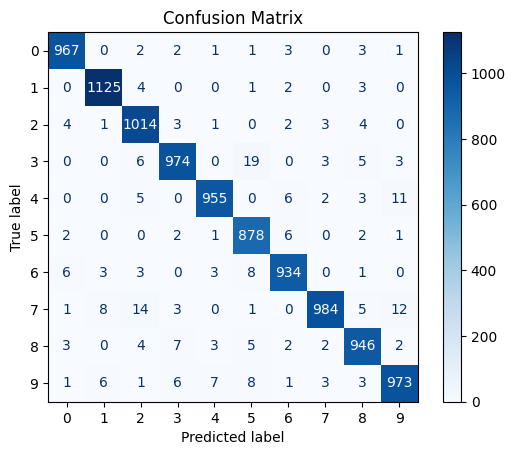

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class probabilities
y_pred_prob = simple_nn_model.predict(x_test)

# Convert predictions to class indices
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

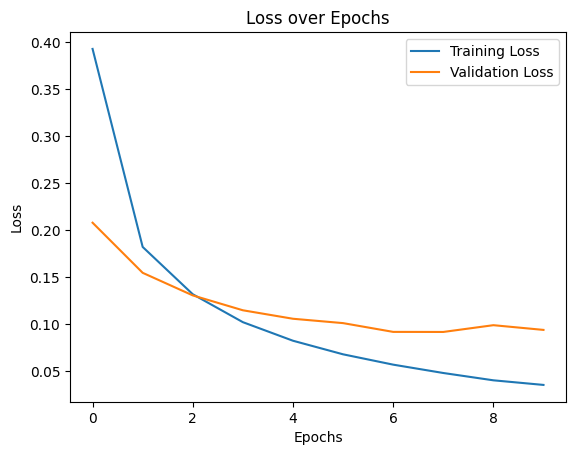

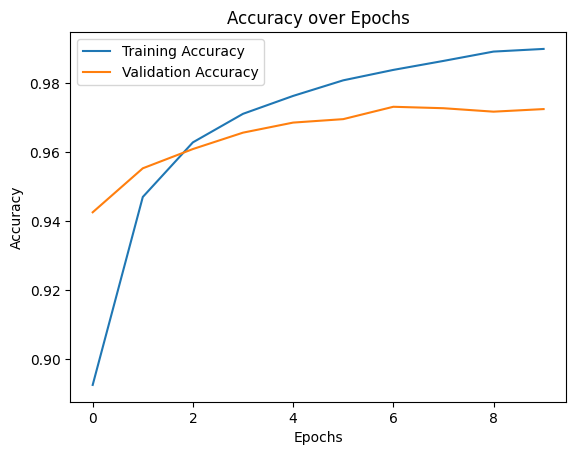

In [12]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history_simple_nn_model.history['loss'], label='Training Loss')
plt.plot(history_simple_nn_model.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history_simple_nn_model.history['accuracy'], label='Training Accuracy')
plt.plot(history_simple_nn_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Convolutional CNN

In [13]:
# Define victim model
c_nn_model = create_cnn()

c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Train victim model
history_c_nn_model = c_nn_model.fit(
    x_train,
    y_train,
    epochs=victim_epochs,
    batch_size=victim_batch_size,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.8362 - loss: 0.5484 - val_accuracy: 0.9767 - val_loss: 0.0814
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9787 - loss: 0.0681 - val_accuracy: 0.9852 - val_loss: 0.0538
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9866 - loss: 0.0428 - val_accuracy: 0.9868 - val_loss: 0.0489
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9896 - loss: 0.0340 - val_accuracy: 0.9861 - val_loss: 0.0473
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9925 - loss: 0.0254 - val_accuracy: 0.9887 - val_loss: 0.0388
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9936 - loss: 0.0191 - val_accuracy: 0.9899 - val_loss: 0.0381
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9946 - loss: 0.0154 - val_accuracy: 0.9884 - val_loss: 0.0407
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9962 - loss: 0.0121 - 

In [15]:
c_nn_model.save("./None/victim_cnn_model.keras")

In [16]:
# Evaluate victim model
loss, acc = c_nn_model.evaluate(x_test, y_test)
print(f"Victim Model Accuracy On Test Set: {acc * 100.0:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9895 - loss: 0.0338
Victim Model Accuracy On Test Set: 99.13%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


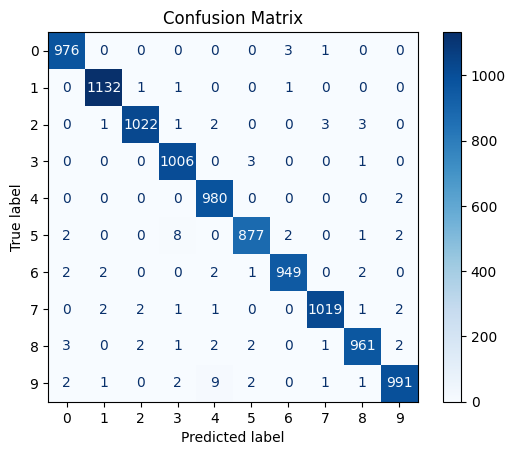

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class probabilities
y_pred_prob = c_nn_model.predict(x_test)

# Convert predictions to class indices
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

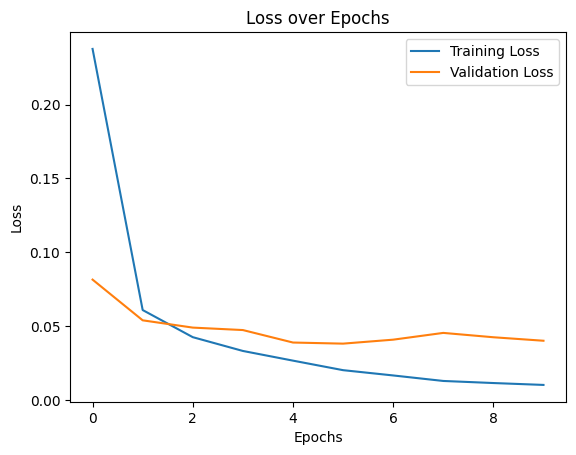

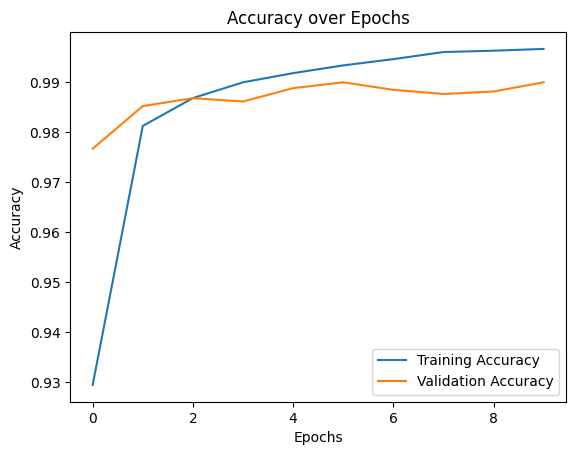

In [18]:
# Accessing and Displaying Training History
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history_c_nn_model.history['loss'], label='Training Loss')
plt.plot(history_c_nn_model.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history_c_nn_model.history['accuracy'], label='Training Accuracy')
plt.plot(history_c_nn_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()